<a href="https://colab.research.google.com/github/amalsalilan/Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/blob/poojitha/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load dataset and inspect structure
import pandas as pd

# Define file path
file_path = ("complete_dataset.csv")
df = pd.read_csv(file_path)




# Display column names and data types
df.info()

# Display first few rows to understand structure
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [ ]:

# Check for missing values
missing_values = df.isnull().sum()

# Display missing values summary
missing_values[missing_values > 0]


,0
solar_exposure,1
rainfall,3


In [ ]:
# Handle missing values
df['solar_exposure'].fillna(method='ffill', inplace=True)  # Forward Fill for solar exposure
df['rainfall'].interpolate(method='linear', inplace=True)  # Linear interpolation for rainfall

# Verify missing values are handled
df.isnull().sum()


<ipython-input-4-caaae98aa0e2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['solar_exposure'].fillna(method='ffill', inplace=True)  # Forward Fill for solar exposure
<ipython-input-4-caaae98aa0e2>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['solar_exposure'].fillna(method='ffill', inplace=True)  # Forward Fill for solar exposure
<ipython-input-4-caaae98aa0e2>:3: FutureWarning: A value is trying to be set on a copy of a DataF

,0
date,0
demand,0
RRP,0
demand_pos_RRP,0
RRP_positive,0
demand_neg_RRP,0
RRP_negative,0
frac_at_neg_RRP,0
min_temperature,0
max_temperature,0


In [ ]:
df.columns


Index(['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day',
       'holiday'],
      dtype='object')

In [ ]:
# Convert 'date' column to datetime format
import pandas as pd
file_path = ("complete_dataset.csv")
df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'])

# Extract time-based features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
df['week_of_year'] = df['date'].dt.isocalendar().week

# Create boolean features
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # Sat & Sun as weekend
df['is_holiday'] = df['holiday'].apply(lambda x: 1 if x else 0)  # Convert holidays to binary
df['is_school_day'] = df['school_day'].apply(lambda x: 1 if x else 0)  # Convert school days to binary

# Display first few rows with new features
df.head()


,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,...,school_day,holiday,year,month,day,day_of_week,week_of_year,is_weekend,is_holiday,is_school_day
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,...,N,Y,2015,1,1,3,1,0,1,1
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,...,N,N,2015,1,2,4,1,0,1,1
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,...,N,N,2015,1,3,5,1,1,1,1
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,...,N,N,2015,1,4,6,1,1,1,1
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,...,N,N,2015,1,5,0,2,0,1,1


In [ ]:


# Check if 'date' column exists and convert it to datetime format
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

    # Extract time-based features
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
    df['week_of_year'] = df['date'].dt.isocalendar().week

    # Create boolean features
    df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # Sat & Sun as weekend

    # Check for holiday and school_day columns before applying transformation
    if 'holiday' in df.columns:
        df['is_holiday'] = df['holiday'].apply(lambda x: 1 if x else 0)
    if 'school_day' in df.columns:
        df['is_school_day'] = df['school_day'].apply(lambda x: 1 if x else 0)

    # Display first few rows with new features
    df.head()
else:
    df.columns  # Show available columns if 'date' is missing


In [ ]:


# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

# Identify numerical columns again after reloading
numeric_cols = df.select_dtypes(include=['number']).columns

# Recalculate outlier bounds using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap extreme outliers using the 1st and 99th percentile (Winsorization)
for col in ['demand', 'RRP', 'demand_pos_RRP', 'demand_neg_RRP',
            'min_temperature', 'max_temperature', 'rainfall']:
    lower_cap = df[col].quantile(0.01)
    upper_cap = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=lower_cap, upper=upper_cap)

# Verify if outliers are handled
outliers_after_capping = ((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).sum()
outliers_after_capping


,0
demand,0
RRP,28
demand_pos_RRP,0
RRP_positive,28
demand_neg_RRP,191
RRP_negative,181
frac_at_neg_RRP,191
min_temperature,0
max_temperature,40
solar_exposure,0


In [ ]:

# Ensure 'date' column exists and convert to datetime format
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.sort_values(by='date', inplace=True)  # Ensure data is sorted by date

    # Create lagged variables
    df['demand_lag_1'] = df['demand'].shift(1)
    df['demand_lag_7'] = df['demand'].shift(7)
    df['temperature_lag_1'] = df['max_temperature'].shift(1)
    df['temperature_lag_7'] = df['max_temperature'].shift(7)

    # Create rolling statistics (7-day moving averages)
    df['demand_7d_avg'] = df['demand'].rolling(window=7).mean()
    df['temperature_7d_avg'] = df['max_temperature'].rolling(window=7).mean()

    # Price-related feature: Indicator for negative prices
    df['is_negative_price'] = (df['RRP'] < 0).astype(int)

    # Drop initial rows with NaN values due to shifting/rolling calculations
    df.dropna(inplace=True)

    # Display first few rows with new features
    df.head()
else:
    df.columns  # Show available columns if 'date' is missing


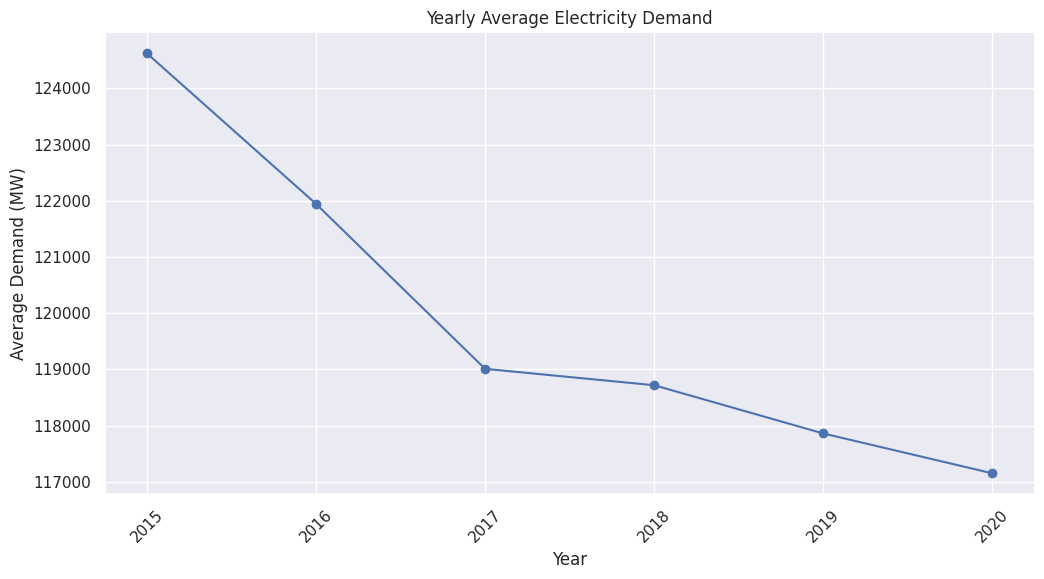

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set_theme(style="darkgrid")

# Yearly Demand Trend
plt.figure(figsize=(12, 6))
df.groupby(df['date'].dt.year)['demand'].mean().plot(marker='o', linestyle='-')
plt.title("Yearly Average Electricity Demand")
plt.xlabel("Year")
plt.ylabel("Average Demand (MW)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Identify numerical and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Apply Min-Max Scaling to numerical columns
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Apply One-Hot Encoding to categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Avoid dummy variable trap, use sparse_output instead of sparse
encoded_cats = encoder.fit_transform(df[categorical_cols])

# Convert encoded categorical data into a DataFrame with proper column names
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded columns
df = df.drop(columns=categorical_cols).reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)

# Display the first few rows after preprocessing
df.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,...,is_school_day,demand_lag_1,demand_lag_7,temperature_lag_1,temperature_lag_7,demand_7d_avg,temperature_7d_avg,is_negative_price,school_day_Y,holiday_Y
0,2015-01-08,0.826003,0.197027,0.847019,0.007837,0.0,1.0,0.0,1.000000,0.631970,...,0.0,1.000000,0.121903,0.973978,0.583643,0.739964,0.818822,0.0,0.0,0.0
1,2015-01-09,0.490165,0.112575,0.546452,0.004612,0.0,1.0,0.0,0.702857,0.252788,...,0.0,0.826003,0.619832,0.631970,1.000000,0.713825,0.690141,0.0,0.0,0.0
2,2015-01-10,0.178533,0.030234,0.267549,0.001468,0.0,1.0,0.0,0.548441,0.390335,...,0.0,0.490165,0.830736,0.252788,1.000000,0.582347,0.585147,0.0,0.0,0.0
3,2015-01-11,0.125736,0.018715,0.220297,0.001029,0.0,1.0,0.0,0.654935,0.605948,...,0.0,0.178533,0.199915,0.390335,0.379182,0.567393,0.624200,0.0,0.0,0.0
4,2015-01-12,0.647330,0.107979,0.687111,0.004437,0.0,1.0,0.0,0.681558,0.747212,...,0.0,0.125736,0.429210,0.605948,0.401487,0.611364,0.683739,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Load dataset
df = pd.read_csv("complete_dataset.csv")

# Select categorical features
categorical_features = ['school_day', 'holiday']  # Add any other categorical columns

# Apply OneHotEncoding
# Use sparse_output=False instead of sparse=False
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(df[categorical_features])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_features,
                          columns=encoder.get_feature_names_out(categorical_features))

# Merge with original dataset
df_encoded = df.drop(columns=categorical_features).join(encoded_df)

# Save or display processed data
df_encoded.to_csv("processed_data.csv", index=False)
print(df_encoded.head())

         date      demand        RRP  demand_pos_RRP  RRP_positive  \
0  2015-01-01   99635.030  25.633696       97319.240     26.415953   
1  2015-01-02  129606.010  33.138988      121082.015     38.837661   
2  2015-01-03  142300.540  34.564855      142300.540     34.564855   
3  2015-01-04  104330.715  25.005560      104330.715     25.005560   
4  2015-01-05  118132.200  26.724176      118132.200     26.724176   

   demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0        2315.790     -7.240000         0.020833             13.3   
1        8523.995    -47.809777         0.062500             15.4   
2           0.000      0.000000         0.000000             20.0   
3           0.000      0.000000         0.000000             16.3   
4           0.000      0.000000         0.000000             15.0   

   max_temperature  solar_exposure  rainfall  school_day_Y  holiday_Y  
0             26.9            23.6       0.0           0.0        1.0  
1             38.8  

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load dataset
file_path = "complete_dataset.csv"
df = pd.read_csv(file_path)

# Convert 'date' column to datetime format and set as index if it exists
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date').sort_index()

# Define categorical features for one-hot encoding (only those that exist in the dataset)
categorical_features = [col for col in ['hour', 'day', 'month', 'weekday', 'season', 'is_weekend'] if col in df.columns]

# Initialize OneHotEncoder
# Use sparse_output instead of sparse
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Avoid dummy variable trap

# Apply encoding only if categorical features exist
if categorical_features:
    encoded_features = encoder.fit_transform(df[categorical_features])
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features), index=df.index)
    df_encoded = df.drop(columns=categorical_features).join(encoded_df)
else:
    df_encoded = df.copy()

# Display the first few rows after encoding
df_encoded.head()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
date,,,,,,,,,,,,,
2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [ ]:


# Convert timestamp column to datetime if it exists
timestamp_col = 'timestamp'  # Replace with actual timestamp column name if different
if timestamp_col in df.columns:
    df[timestamp_col] = pd.to_datetime(df[timestamp_col])

# Check for missing values after preprocessing
missing_values = df.isnull().sum()

# Check for missing timestamps in a continuous time series
if timestamp_col in df.columns:
    df = df.set_index(timestamp_col).sort_index()  # Set and sort by timestamp
    missing_timestamps = df.index.to_series().diff().dt.total_seconds().dropna().ne(df.index.to_series().diff().dt.total_seconds().mode()[0]).sum()
else:
    missing_timestamps = "Timestamp column not found."

# Display missing values and timestamp gaps
missing_values, missing_timestamps


(date                  0
 demand                0
 RRP                   0
 demand_pos_RRP        0
 RRP_positive          0
 demand_neg_RRP        0
 RRP_negative          0
 frac_at_neg_RRP       0
 min_temperature       0
 max_temperature       0
 solar_exposure        0
 rainfall              0
 year                  0
 month                 0
 day                   0
 day_of_week           0
 week_of_year          0
 is_weekend            0
 is_holiday            0
 is_school_day         0
 demand_lag_1          0
 demand_lag_7          0
 temperature_lag_1     0
 temperature_lag_7     0
 demand_7d_avg         0
 temperature_7d_avg    0
 is_negative_price     0
 school_day_Y          0
 holiday_Y             0
 dtype: int64,
 'Timestamp column not found.')

In [ ]:
# Handle missing weather data with forward-fill method
df[['solar_exposure', 'rainfall']] = df[['solar_exposure', 'rainfall']].fillna(method='ffill')

# Reload dataset to check if there's a timestamp column with a different name
df_reset = pd.read_csv("complete_dataset.csv")

# Identify potential timestamp columns
possible_timestamp_cols = [col for col in df_reset.columns if 'time' in col.lower() or 'date' in col.lower()]
possible_timestamp_cols


<ipython-input-17-e910ec21112c>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['solar_exposure', 'rainfall']] = df[['solar_exposure', 'rainfall']].fillna(method='ffill')


['date']

In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set as index and sort for time-series analysis
df = df.set_index('date').sort_index()

# Check for missing timestamps in a continuous time series
missing_timestamps = df.index.to_series().diff().dt.total_seconds().dropna().ne(df.index.to_series().diff().dt.total_seconds().mode()[0]).sum()

# Display result of timestamp validation
missing_timestamps


0

  TRAINING AND *TESTING*

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the preprocessed dataset
file_path = "complete_dataset.csv"
df = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Define target variable (Assuming 'demand' is the target column)
target = 'demand'
X = df.drop(columns=[target])  # Features
y = df[target]  # Target variable

# Perform train-test split (80% train, 20% test)
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Display dataset shapes after splitting
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1684, 12), (422, 12), (1684,), (422,))

using ***ARIMAS***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Load dataset
file_path = "complete_dataset.csv"
df = pd.read_csv(file_path)

# Display first few rows to understand structure
df.head()


,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [ ]:


# Convert date column to datetime format (assuming the column is named 'date' or similar)
df['date'] = pd.to_datetime(df['date'])

# Set date as index
df.set_index('date', inplace=True)

# Selecting the target variable for stationarity check (assuming 'demand' is the target variable)
if 'demand' in df.columns:
    target_series = df['demand']
else:
    target_series = df.iloc[:, 0]  # Fallback to first column if 'demand' isn't explicitly named

# Perform ADF test
adf_test = adfuller(target_series.dropna())
adf_result = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Critical Values": adf_test[4]
}

adf_result



{'ADF Statistic': -3.9534474821262653,
 'p-value': 0.0016748806784635441,
 'Critical Values': {'1%': -3.433499298918619,
  '5%': -2.8629312197305192,
  '10%': -2.56751062103432}}

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

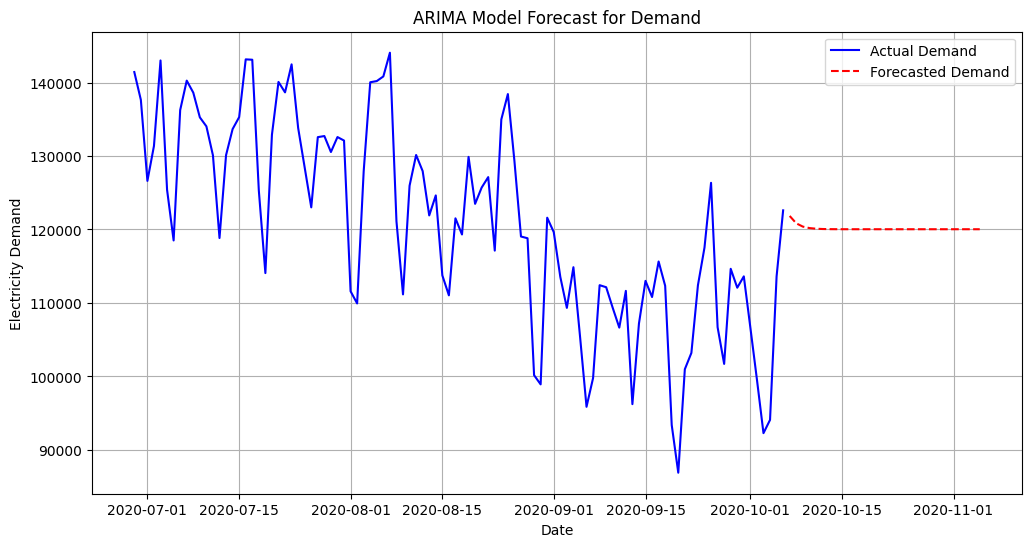

In [ ]:
# Fit an ARIMA model (Auto-regressive Integrated Moving Average)
p, d, q = 2, 0, 2  # Since the series is stationary, d=0

# Fit ARIMA model on demand data
model = ARIMA(df['demand'], order=(p, d, q))
arima_result = model.fit()

# Forecast the next 30 days
forecast_steps = 30
forecast = arima_result.forecast(steps=forecast_steps)

# Plot actual vs forecasted demand
plt.figure(figsize=(12, 6))
plt.plot(df.index[-100:], df['demand'].iloc[-100:], label="Actual Demand", color="blue")
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, label="Forecasted Demand", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Electricity Demand")
plt.title("ARIMA Model Forecast for Demand")
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-13-0c7853436150>:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(pd.date_range(df.index[-1], periods=30, freq='H'), forecast, label='ARIMA Forecast', color='red')


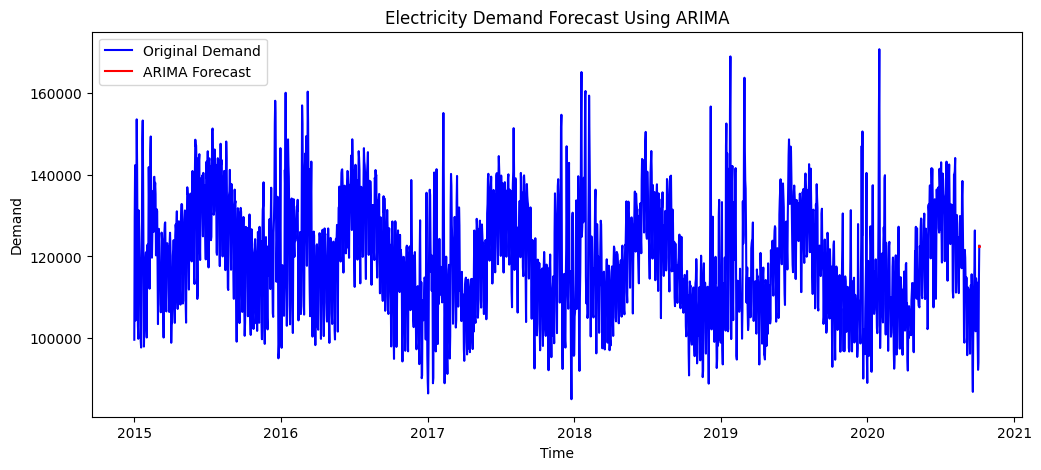

({'ADF Statistic': -3.9534474821262653, 'p-value': 0.0016748806784635441},
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:                 demand   No. Observations:                 2106
 Model:                 ARIMA(1, 1, 1)   Log Likelihood              -22521.684
 Date:                Tue, 04 Mar 2025   AIC                          45049.368
 Time:                        13:08:43   BIC                          45066.324
 Sample:                    01-01-2015   HQIC                         45055.578
                          - 10-06-2020                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1         -0.5115      0.059     -8.659      0.000      -0.627      -0

In [ ]:
# Reload the dataset
file_path = "complete_dataset.csv"
import pandas as pd
df = pd.read_csv(file_path)

# Check if 'timestamp' column exists, if not, try 'date'
timestamp_col = 'timestamp'
if timestamp_col not in df.columns:
    timestamp_col = 'date'  # Assuming 'date' is the timestamp column if 'timestamp' is not found

# Ensure timestamp column is in datetime format
df[timestamp_col] = pd.to_datetime(df[timestamp_col])

# Set timestamp as index (if applicable)
df.set_index(timestamp_col, inplace=True)

# Import the adfuller function
from statsmodels.tsa.stattools import adfuller

# Check stationarity using Augmented Dickey-Fuller test
adf_test = adfuller(df['demand'].dropna())
adf_result = {"ADF Statistic": adf_test[0], "p-value": adf_test[1]}

# Differencing if necessary (to remove trend)
df['demand_diff'] = df['demand'].diff().dropna()
from statsmodels.tsa.arima.model import ARIMA
# Fit ARIMA model (assuming demand follows ARIMA process)
arima_model = ARIMA(df['demand'].dropna(), order=(1, 1, 1))
arima_fit = arima_model.fit()

# Forecast the next 30 periods for validation
forecast = arima_fit.forecast(steps=30)
import matplotlib.pyplot as plt
# Plot the original demand and forecasted values
plt.figure(figsize=(12, 5))
plt.plot(df['demand'], label='Original Demand', color='blue')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='H'), forecast, label='ARIMA Forecast', color='red')
plt.title("Electricity Demand Forecast Using ARIMA")
plt.xlabel("Time")
plt.ylabel("Demand")
plt.legend()
plt.show()

# Output ADF test results and ARIMA summary
adf_result, arima_fit.summary()

In [ ]:
import itertools
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define parameter range
p_values = range(0, 4)  # Autoregressive terms
d_values = range(0, 2)  # Differencing
q_values = range(0, 4)  # Moving Average terms

best_score, best_cfg = float("inf"), None

# Perform Grid Search
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        # Use 'demand' instead of 'Energy_Demand'
        model = ARIMA(df['demand'], order=(p, d, q))
        model_fit = model.fit()
        y_pred = model_fit.predict(start=0, end=len(df)-1)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(df['demand'], y_pred)) # Use 'demand' here as well

        if rmse < best_score:
            best_score, best_cfg = rmse, (p, d, q)
        print(f"ARIMA{(p, d, q)} - RMSE: {rmse:.4f}")
    except:
        continue

print(f"Best ARIMA parameters: {best_cfg} with RMSE: {best_score:.4f}")

ARIMA(0, 0, 0) - RMSE: 13744.7294
ARIMA(0, 0, 1) - RMSE: 10092.4729
ARIMA(0, 0, 2) - RMSE: 9586.7361
ARIMA(0, 0, 3) - RMSE: 9569.1290
ARIMA(0, 1, 0) - RMSE: 11217.9778
ARIMA(0, 1, 1) - RMSE: 11120.7543
ARIMA(0, 1, 2) - RMSE: 9714.1079
ARIMA(0, 1, 3) - RMSE: 9529.4777
ARIMA(1, 0, 0) - RMSE: 10091.9737
ARIMA(1, 0, 1) - RMSE: 9540.1395
ARIMA(1, 0, 2) - RMSE: 9274.9224
ARIMA(1, 0, 3) - RMSE: 9156.6824
ARIMA(1, 1, 0) - RMSE: 11184.5363
ARIMA(1, 1, 1) - RMSE: 10935.8328


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 2) - RMSE: 9587.1669
ARIMA(1, 1, 3) - RMSE: 9515.5120
ARIMA(2, 0, 0) - RMSE: 9712.7833
ARIMA(2, 0, 1) - RMSE: 9539.8734


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 0, 2) - RMSE: 9540.1395
ARIMA(2, 0, 3) - RMSE: 9146.2804
ARIMA(2, 1, 0) - RMSE: 10419.8820
ARIMA(2, 1, 1) - RMSE: 9465.9371


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 2) - RMSE: 9464.1284
ARIMA(2, 1, 3) - RMSE: 9409.2201
ARIMA(3, 0, 0) - RMSE: 9500.1009
ARIMA(3, 0, 1) - RMSE: 9079.2498


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 0, 2) - RMSE: 9294.1763
ARIMA(3, 0, 3) - RMSE: 8989.7488
ARIMA(3, 1, 0) - RMSE: 10316.9372
ARIMA(3, 1, 1) - RMSE: 9465.7564


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - RMSE: 9440.4475
ARIMA(3, 1, 3) - RMSE: 9399.3902
Best ARIMA parameters: (3, 0, 3) with RMSE: 8989.7488


In [ ]:
# Fit model with optimal parameters
p, d, q = best_cfg
model = ARIMA(df['demand'], order=(p, d, q))
model_fit = model.fit()

# Predict values
df['Predicted_Demand'] = model_fit.predict(start=0, end=len(df)-1)


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Compute errors
rmse = np.sqrt(mean_squared_error(df['demand'], df['Predicted_Demand']))
mae = mean_absolute_error(df['demand'], df['Predicted_Demand'])
mape = mean_absolute_percentage_error(df['demand'], df['Predicted_Demand'])

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 8989.7488
MAE: 6987.7026
MAPE: 5.90%


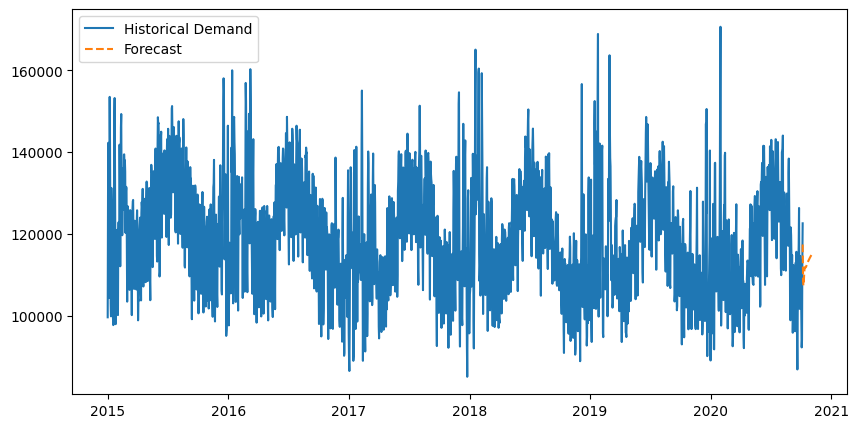

In [ ]:
# Forecast future values
forecast_steps = 30  # Forecast next 30 days
forecast = model_fit.forecast(steps=forecast_steps)

# Plot forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df.index, df['demand'], label="Historical Demand")
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps, freq='D'), forecast, label="Forecast", linestyle="dashed")
plt.legend()
plt.show()


In [ ]:
pip install pandas numpy statsmodels scikit-learn matplotlib


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

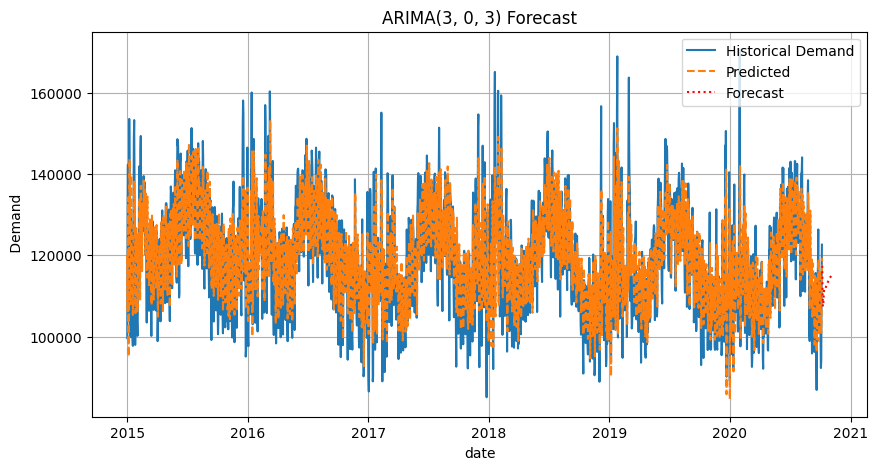

Best ARIMA Parameters: (3, 0, 3)
RMSE: 8989.75, MAE: 6987.70, MAPE: 5.90%


In [ ]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
file_path = "complete_dataset.csv"  # Adjust as needed
df = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Ensure the dataset is sorted by date
df = df.sort_index()

# Define parameter range for Grid Search
p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 4)

best_score, best_cfg = float("inf"), None

for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(df['demand'], order=(p, d, q))
        model_fit = model.fit()
        y_pred = model_fit.predict(start=0, end=len(df)-1)
        rmse = np.sqrt(mean_squared_error(df['demand'], y_pred))
        if rmse < best_score:
            best_score, best_cfg = rmse, (p, d, q)
    except:
        continue

# Fit the ARIMA model with optimal parameters
p, d, q = best_cfg
model = ARIMA(df['demand'], order=(p, d, q))
model_fit = model.fit()

# Predict in-sample values
df['Predicted_Demand'] = model_fit.predict(start=0, end=len(df)-1)

# Compute evaluation metrics
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

rmse = np.sqrt(mean_squared_error(df['demand'], df['Predicted_Demand']))
mae = mean_absolute_error(df['demand'], df['Predicted_Demand'])
mape = mean_absolute_percentage_error(df['demand'], df['Predicted_Demand'])

# Forecast future values (next 30 days)
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Save forecasted data
forecast_dates = pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='D')[1:]
forecast_df = pd.DataFrame({'date': forecast_dates, 'Forecasted_Demand': forecast.values})
forecast_df.to_csv("forecasted_demand.csv", index=False)

# Plot forecast
plt.figure(figsize=(10,5))
plt.plot(df.index, df['demand'], label="Historical Demand")
plt.plot(df.index, df['Predicted_Demand'], label="Predicted", linestyle="dashed")
plt.plot(forecast_dates, forecast, label="Forecast", linestyle="dotted", color='red')
plt.legend()
plt.title(f"ARIMA{best_cfg} Forecast")
plt.xlabel("date")
plt.ylabel(" Demand")
plt.grid()
plt.show()

print(f"Best ARIMA Parameters: {best_cfg}")
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%")
